<h2> Visualizing high-dimensional datasets using PCA and t-SNE </h2>

let's see the MNIST-dataset

In [2]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

let's start by loading in the mnist-original.mat data from the default ~/scikit_learn_data/mldata/ location

In [3]:
data_path = '.'

mnist = fetch_openml('mnist_784')

X = mnist.data / 255.0
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


We are going to convert the matrix and vector to a Pandas DataFrame

In [4]:
feat_cols = [i for i in X.columns]
df = pd.DataFrame(X)
df['y'] = y
df['label'] = df['y'].apply(lambda i : str(i))


print(f'Size of the dataframe: {df.shape}')

Size of the dataframe: (70000, 786)


In [5]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5


<p style = 'text-align: justify'>
Because we don't want to be using 70,000 digits ion some calculations we'll take a random subset of the digits. The randomization is important as the dataset is sorted by its label (i.e. the first seven thousand or so are zeros, etc.). To ensure randomization we'll create a random permutation of the number 0 to 69,999 which allows us later to select the first five or ten thousand for our calculations and visualizations.
</p>

In [144]:
#For reproducibility of the results

np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<p style = 'text-align: justify'>
We now have our dataframe and our randomisation vector. Lets first check what these numbers actually look like. To do this we'll generate 30 plots of randomly selected images
</p>

<Figure size 432x288 with 0 Axes>

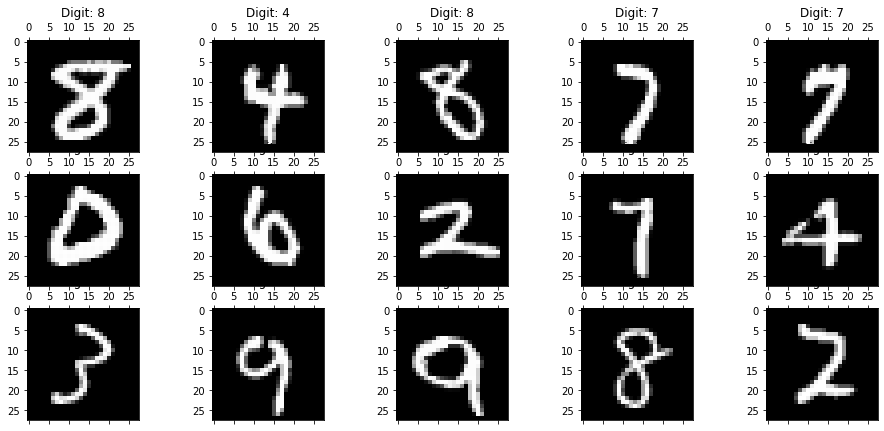

In [147]:
plt.gray()
fig = plt.figure(figsize = (16, 7))
for i in range(0, 15):
    ax = fig.add_subplot(3, 5, i + 1, title = f"Digit: {str(df.loc[rndperm[i], 'label'])}")
    ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape((28, 28)).astype(float))
    
plt.show()

<p style = 'text-align: justify'>
Now we can think about how to distinguish the zeros from the ones and two's and so on. The images are all 28x28 pixel images and therefore have a total of 784 dimensions, each holding the value of one specific pixel.
</p>

<p style = 'text-align: justify'>
What we can do is to reduce the number of dimensions drastically whilst trying to retain as much of the 'variation' in the information as possible. Let's start out with PCA.
</p>
    
<p style = 'text-align: justify'>
First we generate from the original 784 dimensions, the first three principal components. And we'll also see how much of the variation in the total dataset they actually account for.
</p>

1. call the method to apply (with provided parameters)
2. fit_transform method to the pca

```pca.fit_transform``` includes two steps: fitting and transforming, where:

```pca.fit``` trains the model according to the provided data

the result of a ```pca.fit``` can be applied on a different dataset with ```pca.transform``` which applies the trained model to the testing data.

If train and test data are the same (as it is in this case), you can use in one shot ```pca.fit_transform```

In [150]:
pca = PCA(n_components = 3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca_one'] = pca_result[:, 0]
df['pca_two'] = pca_result[:, 1]
df['pca_three'] = pca_result[:, 2]
print(f'Explained variation per principal component: {pca.explained_variance_ratio_}')

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


<p style = 'text-align: justify'>
Now, we have found our first 3 components which account for about 25% of the variation in the entire dataset. Let's see if that is enough to visually set the different digits apart.
What we can do is to create a scatterplot of the first and second principal component and color each of the different types of digits with a different color. If we are lucky the same type of digits will be positioned (i.e. clustered) together in groups which would mean that the first two principal components actually tell us a great deal about the specific types of digits
</p>

<AxesSubplot:xlabel='pca_one', ylabel='pca_two'>

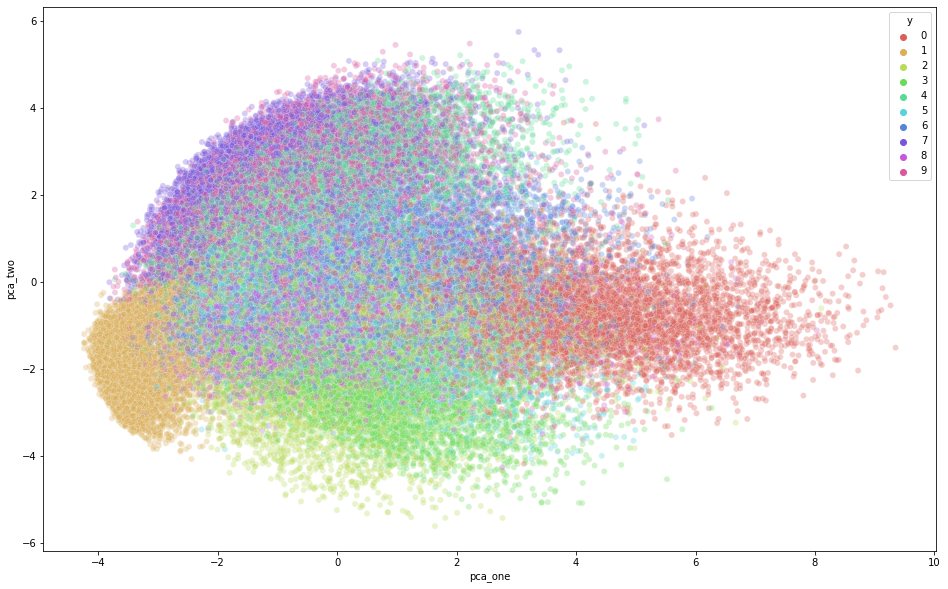

In [152]:
plt.figure(figsize = (16, 10))
sns.scatterplot(
    x = 'pca_one', y = 'pca_two',
    hue = 'y',
    palette = sns.color_palette('hls', 10),
    data = df.loc[rndperm, :],
    legend = 'full',
    alpha = 0.3
)

for a 3d-version of the same plot

In [166]:
df.loc[rndperm, :]['y'].values


['8', '4', '8', '7', '7', ..., '6', '6', '1', '0', '0']
Length: 70000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

<ipython-input-170-9749f8d9e5b1>:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize = (16, 10)).gca(projection = '3d')


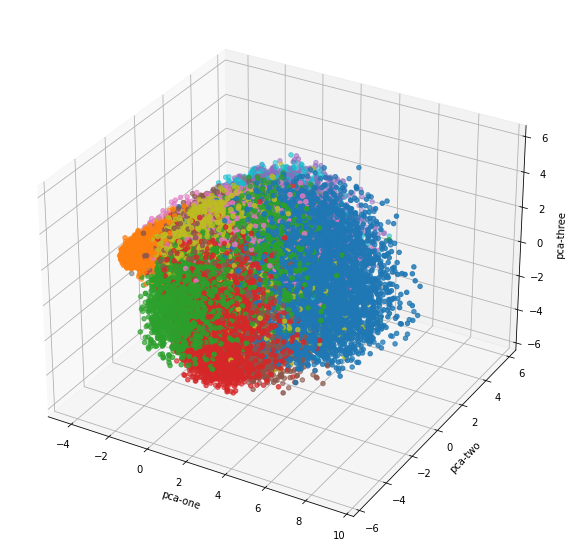

In [170]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize = (16, 10)).gca(projection = '3d')

ax.scatter(
    xs = df.loc[rndperm, :]['pca_one'],
    ys = df.loc[rndperm, :]['pca_two'],
    zs = df.loc[rndperm, :]['pca_three'],
    c = [int(i) for i in df.loc[rndperm, :]['y']],
    cmap = 'tab10'
)

ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

plt.show()

<p style = 'text-align: justify'>
From the graph we can see that the two components definitely hold some information, especially for specific digits, but clearly not enough to set ALL of them apart. Let's see if tSNE can be of help here: we wil first try to run the algo on the actual dimension of the data (784) and see how it does. To make sure we don't burden our machine in terms of memory and power/time we will only use the first 10,000 samples to run the algo on. To compare later on I'll also run the PCA again on the subset
</p>

In [172]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components = 3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:, 0]
df_subset['pca-two'] = pca_result[:, 1]
df_subset['pca-three'] = pca_result[:, 2]
print(f'Explained variation per principal component: {pca.explained_variance_ratio_}')

Explained variation per principal component: [0.09819946 0.07123677 0.06113222]


In [173]:
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(df_subset)
print(f't-SNE done! Time elapsed: {time.time() - time_start}')

C:\Users\ludov\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ludov\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.009s...
[t-SNE] Computed neighbors for 10000 samples in 3.314s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.345708
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.707161
[t-SNE] KL divergence after 300 iterations: 2.538893
t-SNE done! Time elapsed:

<p style = 'text-align: justify'>
Now that we have two resulting dimensions we can again visualise them by creating a scatter plot of the two dimensions and coloring each sample by its respective label
</p>

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

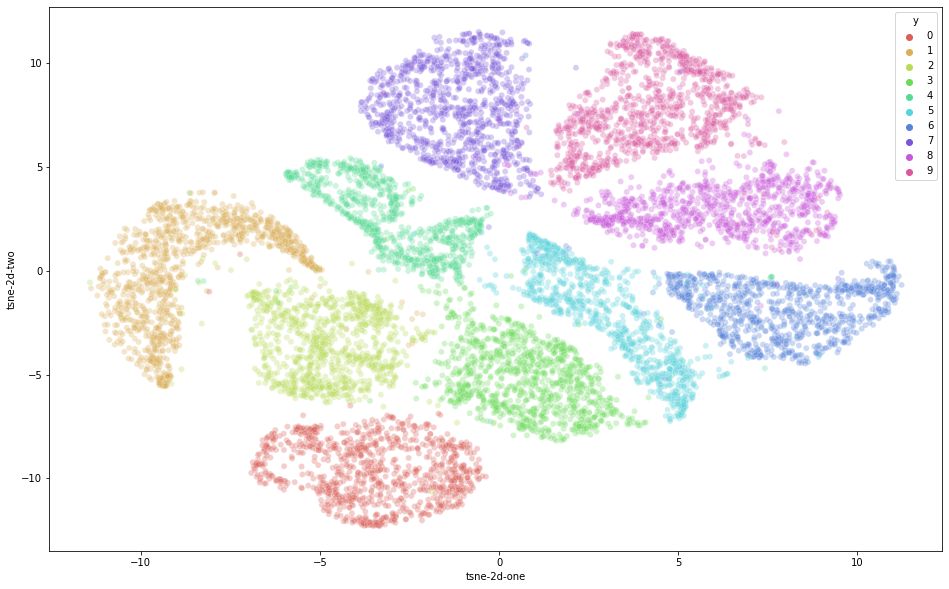

In [174]:
df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]
plt.figure(figsize = (16, 10))
sns.scatterplot(
    x = 'tsne-2d-one', y = 'tsne-2d-two',
    hue = 'y',
    palette = sns.color_palette('hls', 10),
    data = df_subset,
    legend = 'full',
    alpha = 0.3
)

<p style = 'text-align: justify'>
This is already a significant improvement over PCA viz we used earlier. We can see that the digits are very clearly clustered in their own sub groups. If we would now use a clustering algo to pick out the separate clusters we could probably quite accurately assign new points to a label. Just to compare PCA & tSNE:
</p>

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

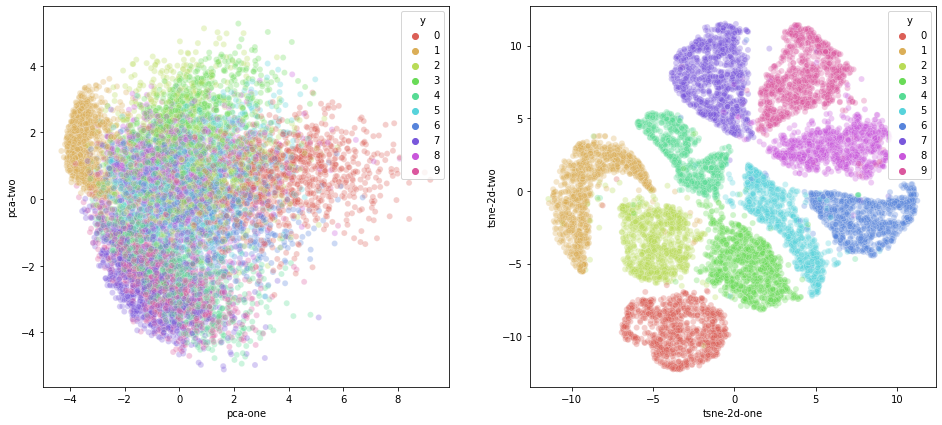

In [175]:
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x = 'pca-one', y = 'pca-two',
    hue = 'y',
    palette = sns.color_palette('hls', 10),
    data = df_subset,
    legend = 'full',
    alpha = 0.3,
    ax = ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x = 'tsne-2d-one', y = 'tsne-2d-two',
    hue = 'y',
    palette = sns.color_palette('hls', 10),
    data = df_subset,
    legend = 'full',
    alpha = 0.3,
    ax = ax2
)

<p style = 'text-align: justify'>
Now we reduce the number of dimensions, before feeding the data into the t-SNE algo. For this we'll use PCA again. We will first create a new dataset containing the fifty dimensions generated by the PCA reduction algo. We can then use this dataset to perform the tSNE on
</p>

In [177]:
pca_50 = PCA(n_components = 50)
pca_result_50 = pca_50.fit_transform(data_subset)
print(f'Cumulative explained variation for 50 principal components: {np.sum(pca_50.explained_variance_ratio_)}')

Cumulative explained variation for 50 principal components: 0.8261570435734747


<p style = 'text-align: justify'>
Amazingly, the first 50 components roughly hold around 85% of the total variation in the data. Now lets try and feed this data into the t-SNE algo. This time we'll use 10,000 samples out of the 70,000 to make sure the algo does not take up too much memory and CPU
</p>

In [180]:
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print(f't-SNE done! Time elapsed: {time.time() - time_start}')

C:\Users\ludov\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ludov\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 2.409s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.830087
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.786865
[t-SNE] KL divergence after 300 iterations: 2.767696
t-SNE done! Time elapsed:

<AxesSubplot:xlabel='tsne-pca-50-one', ylabel='tsne-pca-50-two'>

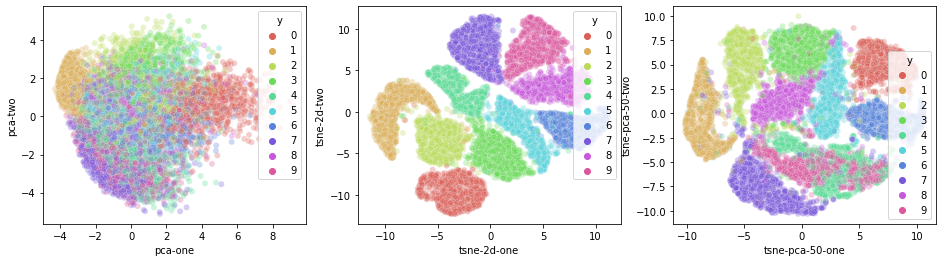

In [182]:
df_subset['tsne-pca-50-one'] = tsne_pca_results[:, 0]
df_subset['tsne-pca-50-two'] = tsne_pca_results[:, 1]

plt.figure(figsize = (16, 4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x = 'pca-one', y = 'pca-two',
    hue = 'y',
    palette = sns.color_palette('hls', 10),
    data = df_subset,
    legend = 'full',
    alpha = 0.3,
    ax = ax1
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x = 'tsne-2d-one', y = 'tsne-2d-two',
    hue = 'y',
    palette = sns.color_palette('hls', 10),
    data = df_subset,
    legend = 'full',
    alpha = 0.3,
    ax = ax2
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x = 'tsne-pca-50-one', y = 'tsne-pca-50-two',
    hue = 'y',
    palette = sns.color_palette('hls', 10),
    data = df_subset,
    alpha = 0.3,
    ax = ax3
)

<p style = 'text-align: justify'>
From this plot we can clearly see how all the samples are nicely spaced apart and grouped together with their respective digits. This could be an amazing starting point to then use a clustering algo and try to identify the clusters or to actually use theese two dimensions as input to another algo (e.g., something like a Neural Network)
</p>

<h3> Transforming New Data with UMAP </h3>
<p style = 'text-align: justify'>
UMAP is useful for generating visualisations, but if y ou want to make use of UMAP more generally for ML tasks it is important to be able to train a model and then later pass new data to the model and have it transform that  data into the learned space. For example if we use UMAP to learn a latent space and then train a classifier on data transformed into the latent space then the classifier is only useful for prediction if we can transform data for which we want a predictikon into the latent space the classifier uses. Fortunately UMAP makes this possibile, albeit more slowly than some other transformers that allow this
</p>

In [183]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [189]:
sns.set(context = 'notebook', style = 'white', rc = {'figure.figsize' : (14, 10)})

<p style = 'text-align: justify'>
To demonstrate this functionality we'll make use of the digits dataset. First let's load all the modules we'll need to get this done
</p>

In [191]:
digits = load_digits()

digits.data.shape

(1797, 64)

In [192]:
#y
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [193]:
#X
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

<p style = 'text-align: justify'>
To keep everything honest let's use sklearn train_test_split to separate our training and test set (stratified over the different digit types). By default train_test_split will carve off 25% of the data for testing, which seems suitable in this case.
</p>

In [194]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    stratify = digits.target,
                                                    random_state = 42)

<p style = 'text-align: justify'>
Now, to get a benchmark idea of what we are looking at, let's train a couple of different classifiers and then see how well they score on the test set. For this example let's try a SVM and a KNN. Ideally we should be tuning hyper-parameters (perhaps a grid search using k-fold cross validation), but for the purposes of this simple demo we will simply use default parameters for both classifiers.
</p>

In [195]:
svc = SVC(gamma = 'scale').fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)

<p style = 'text-align: justify'>
Now we should see how well these classifiers perform on the test set. Conveniently sklearn provides a ```matthews_corrcoef``` function to compute the Multiclass MCC
</p>

In [201]:
(matthews_corrcoef(svc.predict(X_test), y_test),
matthews_corrcoef(knn.predict(X_test), y_test))

(0.9901499202756535, 0.982763071912785)

Since max value of MCC is one, both classifiers are doing very well.

<p style = 'text-align: justify'>
The goal now is to make use of UMAP as a preprocessing step that one could potentially fit into a pipeline. We will therefore obviously need the umap module loaded
</p>

In [203]:
import umap

In [204]:
trans = umap.UMAP(n_neighbors = 5, random_state = 42).fit(X_train)

<p style = 'text-align: justify'>
Since we embedded to two dimensions, we can visualize the results to ensure that we are getting a potential benefit out of this approach. This is simply a matter of generating a scatterplot with data points colored by the class they come from. Note that the embedded training data can be accessed as the ```.embedding_``` attribute of the UMAP model, once we have fitted the model to some data
</p>

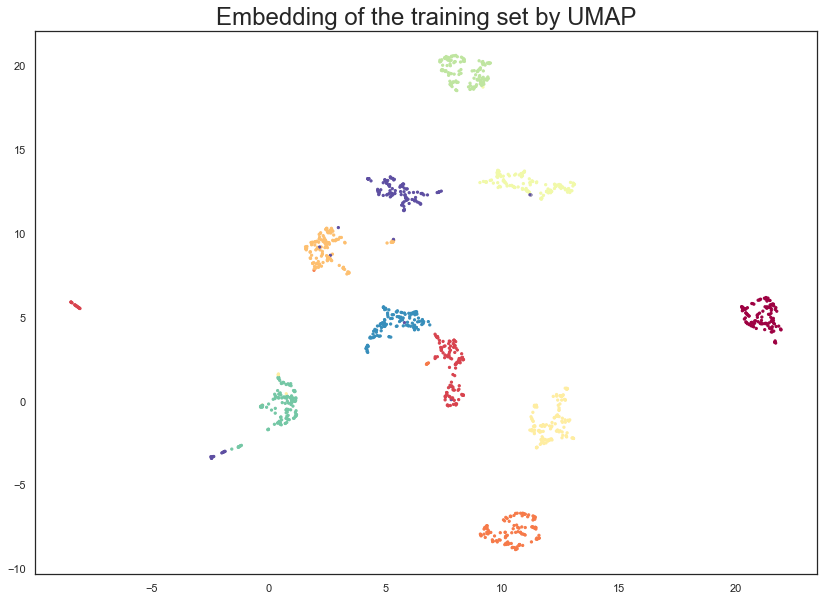

In [208]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 5,
           c = y_train, cmap = 'Spectral')

plt.title('Embedding of the training set by UMAP', fontsize = 24)

plt.show()

<p style = 'text-align: justify'>
This looks very promising! Most of the classes got very cleanly separated, and that gives us some hope that it could help with classifier performance. It is worth noting that this was a completely unsupervised data transform.
</p>

<p style = 'text-align: justify'>
We can now train some new models (again an SVC and a KNN classifier) on the embedded training data. This looks exactly as before, but now we pass it the embedded data (2 dims). Note that calling ```transform``` on input identical to what the model was trained on, will simply return the embedding_ attribute, so sklearn pipelines will work as expected
</p>

In [209]:
svc = SVC(gamma = 'scale').fit(trans.embedding_,  y_train)
knn = KNeighborsClassifier().fit(trans.embedding_, y_train)

<p style = 'text-align: justify'>
Now we want to work with the test data which none of the models (UMAP or the classifiers) have seen. To do this we use the standard sklearn API and make use of the transform method, this time handing it the new unseen test data. We will assign this to test_embedding so that we can take a closer look at the result of applying an existing UMAP model to new data.
</p>

In [210]:
%time test_embedding = trans.transform(X_test)

Wall time: 4.93 s


<p style = 'text-align: justify'>
Note that the transform operations works very efficiently. Compared to some other transformers, this is a little on the slow side, but it is fast enough for many uses. Note that as the size of the training and/or test sets increase, the performance will slow proportionally. It is also worth noting that the first call to transform may be slow due to Numba JIT overhead - further runs will be very fast.
</p>
    
<p style = 'text-align: justify'>
The next question is: what the transform did to our test data? In principle, we have a new two dimensional representation of the test-set, and ideally this should be based on the existing embedding of the training set. We can check this by visualizing the data (since we are in two dimensions) to see if this is true. A simple scatterplot as before will suffice
</p>

Text(0.5, 1.0, 'Embedding of the test set by UMAP')

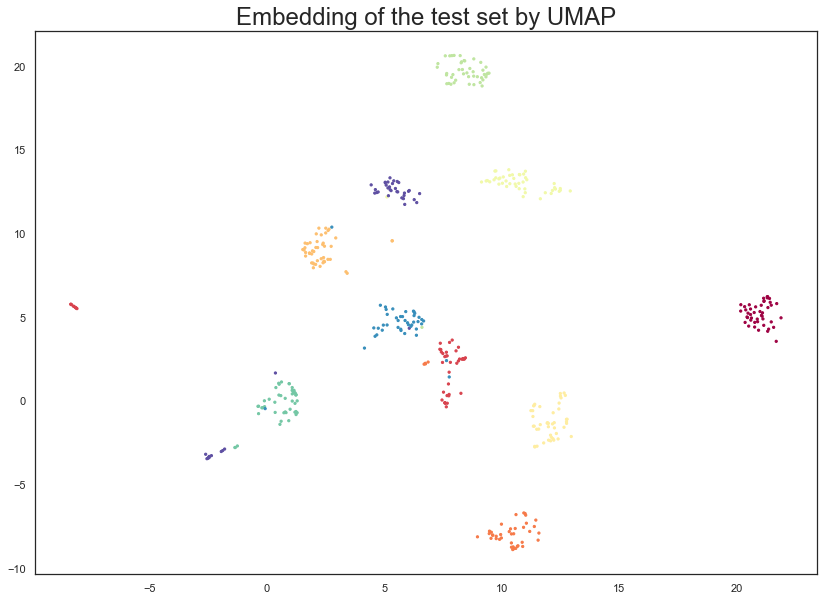

In [212]:
plt.scatter(test_embedding[:, 0], test_embedding[:, 1],
               s = 5, c = y_test, cmap = 'Spectral')
plt.title('Embedding of the test set by UMAP', fontsize = 24)

<p style = 'text-align: justify'> The results look like what we should expect; the test data has been embedded into two dimensions in exactly the locations we should expect (by class) given the embedding of the traning data visualized above. This means we can now try out of models that were trained on the embedded training data by handing them the newly transformed test set </p>

In [216]:
(matthews_corrcoef(svc.predict(trans.transform(X_test)), y_test),
matthews_corrcoef(knn.predict(trans.transform(X_test)), y_test))

(0.9631276515006806, 0.9802830529419548)

<p style = 'text-align: justify'> The results are pretty good, with performances only slightly worse wrt the plain test data. The point here is that we can use UMAP as if it were a standard sklearn transformer as part of an sklearn machine learning pipeline </p>

<p style = 'text-align: justify'>
Juast for fun we can run the same experiments, but this time reduce to ten dimensions (where we can no longer visualize). In practice this will have little gain in this case - for the digits dataset two dimensions is plenty for UMAP and more dimensions won't help. On the other hand, for more complex datasets, where more dimensions may allow for a much more faithful embedding, it is worth noting that we are not restricted to only two dimensions
</p>

In [221]:
trans = umap.UMAP(n_neighbors = 5, n_components = 10, random_state = 42).fit(X_train)

In [222]:
svc = SVC(gamma = 'scale').fit(trans.embedding_, y_train)
knn = KNeighborsClassifier().fit(trans.embedding_, y_train)

In [223]:
(matthews_corrcoef(svc.predict(trans.transform(X_test)), y_test),
matthews_corrcoef(knn.predict(trans.transform(X_test)), y_test))

(0.9606839405514408, 0.9802830529419548)

And we see that in this case we actually marginally improved SVC score. However, for more interesting datasets, the larger dimensional embedding may have been a more significant gain - it is certainly worth exploring as one of the parameters in a grid search across a pipeline that includes UMAP.

<h2> Ten quick tips for effective dimensionality reduction</h2>

<p style = 'text-align: justify'>
Dimensionality reduction (DR) is often applied to analyze high-dimensional data. Both for denoising and simplification. Because "the curse of dimensionality", many statistical methods lack power when applied to high-dimensional data. Even if the number of collected data points is large, they remain sparsely submerged in a voluminous high-dimensional space that is practically impossibile to explore exhaustively. By reducing the dimensionality you can aleviate this phenomenon. Low-dimensional data representations that remove noise but retain the signal of interest can be instrumental in understanding hidden structures and patterns.
</p>

<h4>1. Choose an appropriate method</h4>

<p style = 'text-align: justify'>
    There are a lot of DR methods. So you have to recognize which one is the best given your data (continuous, categorical, count, distance, ...). Often observations can adequately capture only the small-scale relationships between nearby (or similar) data points but not the long-range interactions between distant observations
    In general, <b>linear methods</b> (PCA, CA, MCA, cMDS) are more adapt at preserving global structure; whereas <b>nonlinear methods</b> (kernel PCA, NMDS, Isomap diffusion maps, t-SNE) are better at representing local interactions.
    If observations in your data have assigned class labels and you aim to obtain a representation that best separates them into known categories, you might consider using supervised DR techniques (PLS, LDA, NCA, bottleneck neural network classifier).
</p>


<h4>2. Preprocess continuous and count input data</h4>

<p style = 'text-align: justify'>
before applying DR, suitable data preprocessing is often necessary. For example data centering (for PCA) or scaling, which guarantees that each variable contributes as the others.
Other data transformations may be required depending on the application, the type of data and the DR method used. For example, if changes in your data are multiplicative, you should consider using a log-transform before applying PCA.
</p>

<h4>3. Handle categorical input data appropriately </h4>

<p style = 'text-align: justify'>
when the relationship between the levels (distinct values) of two categorical variables is of interest, CA is applied ot a contingency table (constructed from the data) whose entries are the categories' co-occurrence frequencies. When the input data contain both numerical and categorical variables, two strategies are available. If only a few categorical variables are present, PCA is used on numerical variables, and the group means for the levels of the categorical variables can be projected as supplementary (unweighted) points. On the other hand, if the mixed dataset contains a large number of categorical variables, multiple factor analysis (MFA) can be used.
Traditional PCA cannot be applied to categorical variables, because its objective is to maximize the variance accounted for, a concept that exists only for numerical variables. For 'nominal' (unordered) or 'ordinal' (ordered) categorical variables, variance can be replaced by a chi-squared distance on category frequencies (as in CA), or an appropriate variable transformation can be applied before doing a PCA. Converting categorical variables to dummy binary features is one method; another approach is to use optimal scaling categorical PCA (CATPCA). Optimal scaling replaces original levels of categorical variables with category quantifications such that the variance in the new variables is maximized. CATPCA is the formulated as an optimization problem, in which the squared difference between the quantified data and the principal component is minimized iteratively, alternating between the component scores, the component loadings, and the variable quantification.
</p>

<h4>4. Use embedding methods for reducing similarity and dissimilarity input data </h4>

<p style = 'text-align: justify'>
When neither quantitative nor qualitative features are available,but the relationship is measured as dissimilarities (or similarities). Computing dissimilarities and using distance-based methods might be an effective approach. Make sure that you choose a dissimilarity metric that provides the best summary of your data (e.g. if original data are binary do not use euclidean distance, but manhattan); if the features are sparse, use Jaccard distance.
Other versions of PCA: NDMS, which is an optimization technique that strives to retain only the ordering of the dissimilarities. When the dissimlarity data are only available in nonstandard, qualitative formats, more specialized ordinal embedding methods are available. When using optimization-based multidimensional scaling (MDS), you can choose to preserve only the local interactions by restricting the minimization problem to only the distances from data points to their neighbors (e.g. k-nearest neighbours), this approach can be refereed to as 'local' MDS.
Dissimilarities can also be used as input to t-SNE, which is focused on representing short-range interactions. However, the methods achieves locality in a different way, by converting the supplied distances into proximity measures using a small-tail gaussian kernel.
</p>

<h4>5. Consciously decide on the number of dimensions to retain </h4>

<p style = 'text-align: justify'>
to choose a suitable number of new dimensions to compute is crucial. This step determines whether the signal of interest is captured in the reduced data, especially when DR is applied as a preprocessing step to statistical analyses or ML tasks (e.g. clustering).
Even when data viz is your primary goal, you still need to select a sufficient number of new features to generate. For example, the first two or three Principal Components might explain an insufficient fraction of the variance, in which case the higher-order components should be retained, and multiple combinations of the components should be used for visualizations. In some casds, the strongest signal is a confounding factor, and the variation of interest is captured by higher-order Principal Components. If this is the case, you must use higher-order components to expose the desiderd pattern.
The optimal choice for the number of dimensions to keep depends on the data itself. You need to consult the data first. Remember that the number of dimensions can be at most the minimum of the number of observations (rows) and the number of variables (columns) in your dataset: if your dataset contains expression of 10,000 genes but for only 10 samples, there could not be more than 10 (or even 9 if the input data have been centered) axes in your reduced data representation. For DR methods based on spectral decompositions (PCA or PCoA) you could use the distribution of the eigenvalues to guide your choice of dimensions. In practice, people usually rely on 'scree plots' and 'elbow rule' when making decisions.
A scree plot shows the eigenvalues corresponding to each of the axis in the output representation or, equivalently, the proportion of the variance each axis explains.
When viewing the plot, you should look for a cutoff point, in which an eigenvalue drops significantly below the level of the one immediately preceding it - the 'elbow' point. Alternatively, you can inspect a histogram of the eigenvalues and search for the large values that 'stand out' from the bulk. Formally, the Marchenko-Pastur distribution asymptotically models the distribution of the singular values of large random matrices. Therefore, for datasets large in both the number of obs and features, you use a rule of retaining only eigenvalues outside the support of the fitted Marchenko-Pastur distribution; however, remember that this applies only when your data have at least thousands of samples and thousands of features.
For nonspectral, optimization-based methods, the number of components is usually prespecified before DR. When using these approaches, the number of components can be chosen by repeating the DR process using an increasing number of dimensions and evaluating whether incorporating more components achieves a significantly lower value of the loss function that the method minimizes, e.g. the Kullback-Leiber (KL) divergence between transition probabilities defined for the input and the output data in the case of t-SNE. Ideally, you would like your findings to be robust to the number of dimensions you choose.
</p>

<h4>6. Apply the correct aspect ratio for your visualizations </h4>

<p style = 'text-align: justify'>
It is crucial that the DR plots accurately reflect the output of the DR methods used. An important attribute is the aspect ratio: the proportional relationship between the height and the width of a 2D plot can strongly influence your perception of the data; therefore, the DR plots should obey the aspect ratio consistent with the relative amount of information explained by the output axes displayed.
In case of PCA or PCoA, each output dimension has a corresponding eigenvalue, proportional to the amount of variance it explains. If the aspect ratio is arbitrary, is hard to get an adequate picture of the data. Two dimensional PCA plots with equal height and width are misleading. You need to ensure that in the plots, one 'unit'
 in direction of one PC has the same length as one 'unit' in direction of another PC. With adding + coords_fixed(1) will ensure a correct aspect ratio.
</p>


<h4>7. Understand the meaning of the new dimensions </h4>

<p style = 'text-align: justifty'>
DR project the original space into a new space. In a linear process the new coordinates would be a linear combinations of the original ones. Feature maps or correlation circles can be used to determine which original variables are associated with each other or with the newly generated output dimensions. The angles between the feature vectors or with the PC axes are informative: vectors at approximately 0 (180) degrees with each other indicate that the corresponding variables are closely, positively (negatively) related, wheares vectors with a 90 degrees angle indicate rough independence.
A variable's contribution to a given new axis is computed as the ratio between its squared coordinate (in the axis) and the corresponding sum over all variables; the ratio is often converetd to percentages. When working with high-dimensional data, a contribution bar plot for thousands or more variables is not practical; instead you can limit the plot, showing only the top few features with highest contribution. If you want to see both variables and observations a 'biplot' can be used.
</p>

<h4> 8. Find the hidden signal</h4>

<p style = 'text-align: justify'>
Primary objective of DR is to compress data while preserving most of the meaningful information. Compression facilitates the process of understanding the data because the reduced data representation is expected to capture the dominant sources of variation more efficiently. The aim is to uncover the 'hidden variables' that can succesfully expose the underlying structure of hte data. The most frequently encountered latent patterns are discrete clusters or continuous gradients.
In the former case, similar obs bundle together away from other groups. When performing a cluster analysis, it is a common practice to first apply PCA. PCA  reduction is intended as a noise-reduction step because the top eigenvectors are expected to contain all signals of interest. However, this is not true for all the DR methods. The output generated by neighborhood embedding techniques, such as t-SNE, should not be used for clustering, as they preserve neither distances nor densities - both quantities highly important in the interpretation of clustering output.
Unlike discrete clusters, continuous changes in the data are less frequently identified. It is important to know how to identify and accurately interpret latent gradients, as they often appear in biological data associated with unknown continuous processes. Gradients are present when data points do not separate in distinct tightly packed clusters but instead exhibit a gradual shift from one extreme to another. It has to be noted that data points are often arranged in horseshoes or arch-shaped configurations. This effect can appear in PCA and cMDS plots when the associated eigenvectors take on a specific form that implies an underlined gradient structure.
Continuous transitions are frequently encountered when measurements are taken over time (e.g. cell development). There can be even multiple gradients affecting the data, and a steady change can be recorded in different directions. If the variables behind the observed continuous gradient are unknown, you should focus on finding the discrepancies between the observations at the endpoints (extremes) of the gradient by inspecting the differences between their values for any available external covariates, if collected. Otherwise, you might need to gather additional info on the samples in your dataset to investigate the explanation of these differences.
Additional contiguous measurements - those not used in DR - are frequently collected on observations included in the dataset. The extra information can be used to improve the understanding of the data. For example to include them in the DR visualization as color, shape, size or even transparency of corresponding points on the plot.
</p>

<h4> 9. Take advantage of multidomain data </h4>

<p style = 'text-align: justify'>
Sometimes, more than one set of measurements is collected for the same set of samples (i.e. for the same patient are available different levels biological/clinical data). Integrating multiple datasets allows you to both obtain a more accurate representation of higher-order interactions and evaluate the associated variability. Samples often exhibit varying levels of uncertainty, as different regions of the data can be subjects to different rates of changes or fluctiations.
One way of dealing with multidomain (or multimodal, multiway, multiview, multinomics) data, is to perform DR for each dataset separately and then align them together using a Procrustes transformation - a combination of translation, scaling and rotation to align one configuration with another as closely as possible. This allows to define a consensus space where to align all the levels.
</p>

<h4> 10. Check the robustness of your results and quantify uncertainties </h4>

<p style = 'text-align: justify'>
For some datasets, the PCA Principal Components are ill defined (i.e., two or more successive PCs may have very similar variances, and the corresponding eigenvalues are almost exactly the same).
Although a subspace spanned by these components together is meaningful, the eigenvectors (PCs) are not informative individually, and their loadings cannot be interpreted separately, because a very slight change in even one observation can lead to a completely different set of eigenvectors. In these cases, we say that these PCs are unstable. The dimensions corresponding to similar eigenvalues need to be kept together and not individually interpreted.
Another problem may arise when you want to check the stability of your results against different parameter settings. For example, when running t-SNE you need to pick a value for perplexity, and different settings can alter the results obtained even qualitatively. It has observed that when perplexity is too small, 'artificial clusters' start forming in t-SNE plots. So you should not use the values of the t-SNE objective function, the KL divergence, as a criterion to choose an optimal perplexity, because KL always decreases (monotonically) as perplexity values increase. For t-SNE a BIC rule for selecting perplexities was proposed.
In practice, you should repeat DR computations for a range of input parameters and visually evaluate whether the patterns discovered are consistent across varying specifications, as stability theory for t-SNE has not yet been developed. In particular, if the clustering pattern disappears with only a slight increase of the perplexity value, the grouping you observed might be only an artifact due to an unsuitably small choice of the parameter.
Another concern is a method's stability against outliers. In general, it is known that observations far from the origin have more influence on the PCs than the ones close to the center; sometimes it is possible that only a small fraction of the samples in the data almost fully determines the PCs. You should be mindful of these situations and verify that the structure captured by DR represents the bulk of the data and not just a few outliers. In DR maps, the outliers are the remote points, distant from the majority of the observations. In the case of PCA and other linear methods, if all of the points in a sample projection plot are located close to the origin (the center of the plot), with only one or a few points lying very far away, the DR solution is said to be dominated by the outliers. You should inspect suitable data-specific quality control metrics for these points and consider their removal. If samples are removed, the DR needs to be recomputed, and the changes in the output representation should be noted. Observe how observations shift by comparing the DR visualizations before and after the removal of the outliers. You should consider removing not only the technical outliers, but also the 'outgroups', the aberrant groups known to be extensively different from the majority of the data.
Another used strategy to deal with stability, is estimate the uncertainties associated with observations by constructing a collection of 'bootstrap' datasets (i.e., random subsets of the data generated by resampling observations with replacement). The bootstrap set can be treated as multiway data, and the STATIS or Procrustes aligning method described before. Obtaining multiple coordinates estimates per data point allows you to estimate the corresponding uncertainty.
</p>


<h4> Conclusion </h4>

<p style = 'text-align: justify'>
Despite their widespread adoption, DR methods are often misused or misinterpreted. Most of the recommendations discussed here apply to any DR method, but some were for specific reduction approaches.
Keep track of all the decisions you make, including the method you select, the distances or kernels you choose, and the values of parameters you use. The most convenient way to save all steps of your work together with the results obtained is t hrough an R, an IPython, or a Jupyer notebook.
Recording your choices is a crucial part of reproducible research, because it allows others to replicate the same results you obtained and speeds up your analysis process the next time you work with similar data.
</p>